# Imports

In [1]:
import pandas as pd

import numpy as np

import os, glob

import matplotlib.pyplot as plt

import seaborn

import sklearn

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

from sklearn.datasets import load_iris



import tensorflow as tf
devs = tf.config.list_physical_devices('GPU')
for dev in devs:
    tf.config.experimental.set_memory_growth(dev, True)
    print(dev)

from tensorflow.keras import Sequential, optimizers, losses, layers



%matplotlib inline












PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


# Data Pre-processing

In [2]:
df_overview = pd.read_csv('/kaggle/input/battery-remaining-useful-life-rul/Battery_RUL.csv')
df_overview.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [3]:
def plot_dataframe_subplots(df, nrows, ncols, figsize=(30, 24)):
    """Plot a nrows x ncols grid of the df variables against the first column."""
    
    measurements = list(df.columns)
    plt.figure(figsize=figsize)
    
    # Use measurements[0] as the x-axis for all other variables
    x_values = df[measurements[0]]  # X-axis variable
    
    for idx, key in enumerate(measurements[1:], 1):  # Start from second measurement
        plt.subplot(nrows, ncols, idx)
        plt.plot(x_values, df[key])  # Plot other variables against measurements[0]
        plt.ylabel(key)
        plt.grid(True)
        plt.xlabel(measurements[0])  # X-axis is always measurements[0]

    plt.tight_layout()
    plt.show()


In [4]:
df_master = df_overview

print(list(df_master.columns.values))

['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'RUL']


In [5]:
df_master.head()


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [6]:
import pandas as pd

# get columns with NaN values

cols_with_nan = df_master.columns[df_master.isna().any()].tolist()



# print out columns with NaN values and how many NaN values they have

for col in cols_with_nan:

    print(col, "has", df_master[col].isna().sum(), "NaN values")

In [7]:
dftest = df_master

In [8]:
print(list(dftest.columns.values))

['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'RUL']


In [9]:
import pandas as pd

# get columns with NaN values

cols_with_nan = dftest.columns[dftest.isna().any()].tolist()



# print out columns with NaN values and how many NaN values they have

for col in cols_with_nan:

    print(col, "has", dftest[col].isna().sum(), "NaN values")

In [10]:
dftest=dftest.dropna()

In [11]:
import pandas as pd

# get columns with NaN values

cols_with_nan = dftest.columns[dftest.isna().any()].tolist()



# print out columns with NaN values and how many NaN values they have

for col in cols_with_nan:

    print(col, "has", dftest[col].isna().sum(), "NaN values")

In [12]:
print(list(dftest.columns.values))

['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'RUL']


In [13]:


def set_negative_plot_color():

    plt.figure(figsize=(30, 6), facecolor='black')

    ax = plt.axes()

    ax.set_facecolor("black")

    ax.spines['bottom'].set_color('white')

    ax.spines['top'].set_color('white')

    ax.spines['right'].set_color('white')

    ax.spines['left'].set_color('white')

    ax.tick_params(colors='white', which='both')

    plt.grid(True)



def regression_metrics(y_test, y_pred):

    # calculate errors

    mse = mean_squared_error(y_test, y_pred)

    rmse = mean_squared_error(y_test, y_pred, squared=False)

    eps = 1e-10 # a small value to avoid division by zero

    rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred) / (y_test + eps)))))

    #rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred)/y_test)), axis=0))

    mae = mean_absolute_error(y_test, y_pred)

    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    r2_score = sklearn.metrics.r2_score(y_test, y_pred)

    # report error

    print(f'Mean Squared Error: {mse}')

    print(f'Root Mean Square Error: {rmse}')

    print(f'Root Mean Square Percentage Error: {rmspe}')

    print(f'Mean Absolute Error: {mae}')

    print(f'Mean Absolute Percentage Error: {mape}')
    
    print(f'R2 score: {r2_score}')





def plot_comparison(y_test, y_pred, xlabel, ylabel, dark_mode=False, figsize=(30, 6)):

    import matplotlib as mpl

    mpl.rcParams['agg.path.chunksize'] = 200

    mpl.rcParams['path.simplify_threshold'] = 0.5

    if dark_mode:

        plt.figure(figsize=figsize, facecolor='black')

        ax = plt.axes()

        ax.set_facecolor("black")

        ax.spines['bottom'].set_color('gray')

        ax.spines['top'].set_color('gray')

        ax.spines['right'].set_color('gray')

        ax.spines['left'].set_color('gray')

        ax.tick_params(colors='white', which='both')

        plt.plot(y_pred, color="yellow")

        plt.plot(y_test, color="white")

        plt.legend(['Predicted', 'Measured'])

        plt.xlabel(xlabel, color='white')

        plt.ylabel(ylabel, color='white')

    else:

        plt.figure(figsize=figsize)

        plt.plot(y_pred)

        plt.plot(y_test)

        plt.legend(['Predicted', 'Measured'])

        plt.xlabel(xlabel)

        plt.ylabel(ylabel)

    plt.grid(True)


In [14]:
X=dftest.drop(['RUL'],axis=1)

y= dftest['RUL']

In [15]:
df_x_y = dftest

In [16]:
print(list(df_x_y.columns.values))

['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'RUL']


In [17]:
# from sklearn.model_selection import train_test_split

X = df_x_y.drop(['RUL'], axis=1)

y = df_x_y[['RUL']]  # Close the square bracket

# Split the data into train and test sets with a ratio of 95:5

splitter = int(len(X) * 0.95)

X_train, X_test = X.values[:splitter], X.values[splitter:]

y_train, y_test = y.values[:splitter], y.values[splitter:]



# Split the train set into train and validation sets with a ratio of 90:10

splitter1 = int(len(X_train) * 0.9)

X_train, X_val = X_train[:splitter1], X_train[splitter1:]

y_train, y_val = y_train[:splitter1], y_train[splitter1:]



# Check the dataset sizes

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)


(12879, 8) (12879, 1) (1431, 8) (1431, 1) (754, 8) (754, 1)


# Activation functions for comapring
* ReLU
* Tanh
* Proposed 1 (P_Talu)
* Proposed 2 (Tar)
* Proposed 3 (Trh)

In [18]:
class P_Talu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(P_Talu, self).__init__(**kwargs)
        self.a = self.add_weight(name='a', shape=(), initializer='random_uniform', trainable = True)
    def call(self, x):
        return tf.where(
            x > 0,
            x,
            tf.where(
                x > -abs(self.a),
                tf.tanh(x),
                tf.tanh(-abs(self.a))
            )
        )
    

# Custom Activation Functions 

In [19]:
class Tar(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Tar, self).__init__(**kwargs)
        self.a = self.add_weight(name='a', shape=(), initializer='ones', trainable = True)
    def call(self, x):
        tan = (self.a * tf.tanh(x))
        rel = tf.nn.relu(x)
        return tan+rel

class Trh(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Trh, self).__init__(**kwargs)
        self.a = self.add_weight(name='a', shape=(), initializer='ones', trainable = True)
    def call(self, x):
        return tf.where(
            x > 0,
            x,
            self.a * tf.tanh(x)
        )
class Ter(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Ter, self).__init__(**kwargs)
        self.a = self.add_weight(name='a', shape=(), initializer='ones', trainable=True)
    def call(self, x):
        return tf.where(
            x > 0,
            self.a * x,
            tf.tanh(x)
        )

# Model 1 with ReLU

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 8, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


I0000 00:00:1730138183.842262     107 service.cc:145] XLA service 0x5b7979c04310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730138183.842314     107 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 46/202 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 393.4479 - mae: 393.2545

I0000 00:00:1730138186.627243     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - loss: 201.1809 - mae: 200.9803 - val_loss: 85.6195 - val_mae: 85.3552 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 43.1979 - mae: 42.9040 - val_loss: 66.2395 - val_mae: 65.8869 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 43.4304 - mae: 43.0668 - val_loss: 10.3278 - val_mae: 9.9356 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 32.0901 - mae: 31.6973 - val_loss: 33.0538 - val_mae: 32.6130 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 34.3545 - mae: 33.9081 - val_loss: 41.1596 - val_mae: 40.6955 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 29.1654 - mae: 28.6795 - val_loss: 9.4955 - val_mae: 8.9525 - learning_rate: 0.0100
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 26.2905 - mae: 25.7535 - val_loss: 44.1882 - val_mae: 43.6532 - lear

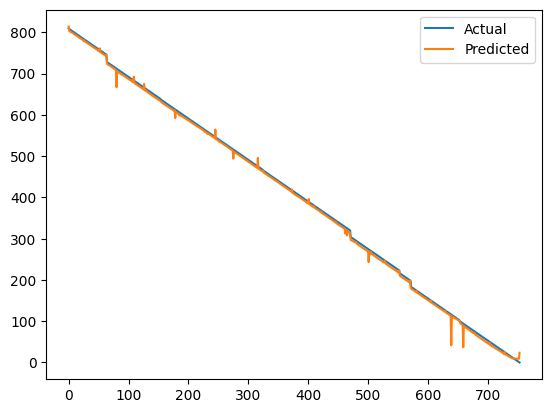

In [20]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, LSTM, Bidirectional

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...



# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Activation('relu')(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(LSTM(32, activation='relu', return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)



# Dense layers

dense1 = Dense(16, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)

dense2 = Dense(8, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model3 = Model(inputs=input_layer, outputs=output_layer)

combined_model3.summary()



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model3.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15)
lronplat = ReduceLROnPlateau(monitor='val_loss', patience=3)

# Train the model

history = combined_model3.fit(X_train_norm, y_train, epochs=100, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model3.predict(X_test_norm)

regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()


# Model 1 with Tanh

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 8, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,953 (70.13 KB)

 Trainable params: 17,953 (70.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 546.7984 - mae: 546.6583 - val_loss: 599.3212 - val_mae: 599.2461 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 532.7263 - mae: 532.6282 - val_loss: 583.0527 - val_mae: 582.8649 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 515.7048 - mae: 515.4757 - val_loss: 568.0424 - val_mae: 567.6722 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 500.0513 - mae: 499.6235 - val_loss: 554.1114 - val_mae: 553.4955 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 483.3104 - mae: 482.6219 - val_loss: 540.9227 - val_mae: 540.0014 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 464.9566 - mae: 463.9496 - val_loss: 528.4423 - val_mae: 527.1599 - learning_rate: 0.0100
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 459.1442 - mae: 457.7612 - val_lo

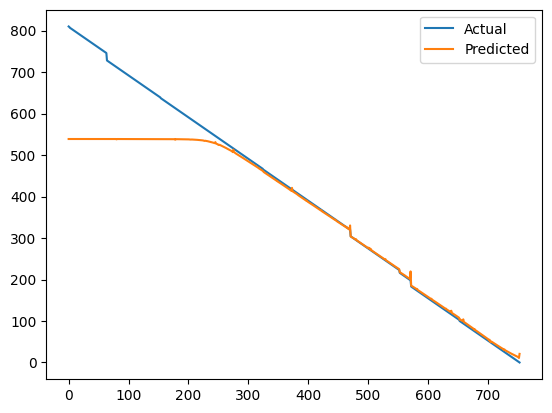

In [21]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, LSTM, Bidirectional

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...



# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Activation('tanh')(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(LSTM(32, activation='tanh', return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)



# Dense layers

dense1 = Dense(16, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)

dense2 = Dense(8, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model3 = Model(inputs=input_layer, outputs=output_layer)

combined_model3.summary()



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model3.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model

history = combined_model3.fit(X_train_norm, y_train, epochs=100, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model3.predict(X_test_norm)

regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()


# Model 1 with P_Talu

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 8, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu (P_Talu)                │ (None, 8, 32)          │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu_1 (P_Talu)              │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu_2 (P_Talu)              │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu_3 (P_Talu)              │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,957 (70.14 KB)

 Trainable params: 17,957 (70.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 336.2500 - mae: 335.7386 - val_loss: 12.5386 - val_mae: 11.5310 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10.0840 - mae: 9.0847 - val_loss: 6.9919 - val_mae: 6.0235 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.7679 - mae: 7.8015 - val_loss: 15.1197 - val_mae: 14.1668 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.9081 - mae: 6.9584 - val_loss: 7.8487 - val_mae: 6.9101 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.9058 - mae: 6.9702 - val_loss: 10.4951 - val_mae: 9.5666 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.5367 - mae: 4.6082 - val_loss: 5.9459 - val_mae: 5.0207 - learning_rate: 1.0000e-03
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.7523 - mae: 3.8288 - val_loss: 6.5609 - val_mae: 5.6423 - learni

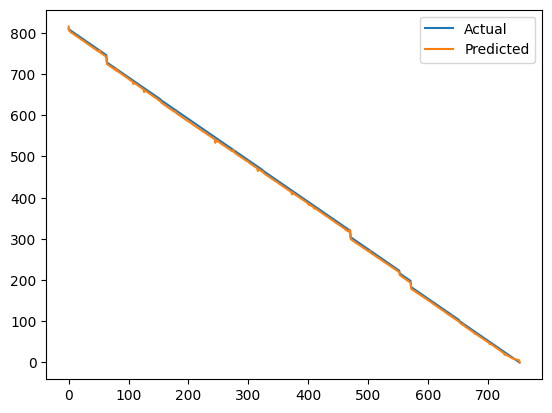

In [22]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, LSTM, Bidirectional

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...



# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = P_Talu()(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(LSTM(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)

bilstm_layer = P_Talu()(bilstm_layer)

# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense1 = P_Talu()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = P_Talu()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model3 = Model(inputs=input_layer, outputs=output_layer)

combined_model3.summary()



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model3.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model

history = combined_model3.fit(X_train_norm, y_train, epochs=100, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model3.predict(X_test_norm)

regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()


# Model 1 with Tar

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 8, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar (Tar)                       │ (None, 8, 32)          │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar_1 (Tar)                     │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar_2 (Tar)                     │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar_3 (Tar)                     │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,957 (70.14 KB)

 Trainable params: 17,957 (70.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 298.0570 - mae: 297.5396 - val_loss: 6.5614 - val_mae: 5.7573 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10.7980 - mae: 10.0077 - val_loss: 13.6264 - val_mae: 12.8533 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10.3713 - mae: 9.5932 - val_loss: 12.4091 - val_mae: 11.6213 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.6465 - mae: 8.8568 - val_loss: 8.3083 - val_mae: 7.4737 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.9449 - mae: 5.1144 - val_loss: 6.9779 - val_mae: 6.1593 - learning_rate: 1.0000e-03
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.1997 - mae: 4.3841 - val_loss: 5.7245 - val_mae: 4.9157 - learning_rate: 1.0000e-03
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.1466 - mae: 4.3402 - val_loss: 6.4644 - val_mae: 5.6650 - l

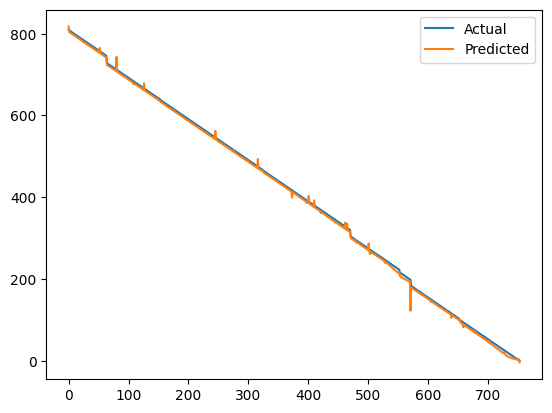

In [23]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, LSTM, Bidirectional

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...



# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Tar()(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(LSTM(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)

bilstm_layer = Tar()(bilstm_layer)

# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense1 = Tar()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Tar()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model3 = Model(inputs=input_layer, outputs=output_layer)

combined_model3.summary()



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model3.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model

history = combined_model3.fit(X_train_norm, y_train, epochs=100, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model3.predict(X_test_norm)

regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()


# Model 1 with Trh

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 8, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh (Trh)                       │ (None, 8, 32)          │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh_1 (Trh)                     │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh_2 (Trh)                     │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh_3 (Trh)                     │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,957 (70.14 KB)

 Trainable params: 17,957 (70.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 324.1981 - mae: 323.6672 - val_loss: 9.6417 - val_mae: 8.7672 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 12.5052 - mae: 11.6292 - val_loss: 11.3628 - val_mae: 10.4794 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10.9898 - mae: 10.1096 - val_loss: 9.7564 - val_mae: 8.8811 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.9951 - mae: 8.1102 - val_loss: 12.2216 - val_mae: 11.3425 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.6648 - mae: 4.7873 - val_loss: 6.8042 - val_mae: 5.9345 - learning_rate: 1.0000e-03
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.1374 - mae: 4.2700 - val_loss: 7.4725 - val_mae: 6.6116 - learning_rate: 1.0000e-03
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.0187 - mae: 4.1592 - val_loss: 7.4312 - val_mae: 6.5771 - 

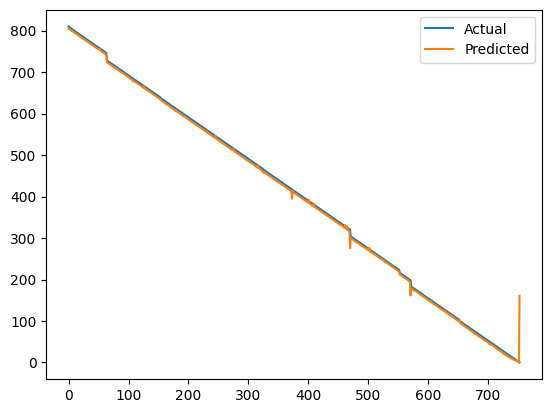

In [24]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, LSTM, Bidirectional

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...



# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Trh()(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(LSTM(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)

bilstm_layer = Trh()(bilstm_layer)

# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense1 = Trh()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Trh()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model3 = Model(inputs=input_layer, outputs=output_layer)

combined_model3.summary()



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model3.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model

history = combined_model3.fit(X_train_norm, y_train, epochs=100, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model3.predict(X_test_norm)

regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()


# Model 1 with Ter

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 8, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter (Ter)                       │ (None, 8, 32)          │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter_1 (Ter)                     │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter_2 (Ter)                     │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter_3 (Ter)                     │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,957 (70.14 KB)

 Trainable params: 17,957 (70.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 334.2185 - mae: 333.7560 - val_loss: 9.3675 - val_mae: 8.7122 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10.2036 - mae: 9.5559 - val_loss: 7.3093 - val_mae: 6.6687 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.2151 - mae: 8.5712 - val_loss: 6.7212 - val_mae: 6.0770 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.8278 - mae: 8.1879 - val_loss: 13.2198 - val_mae: 12.5944 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.9202 - mae: 8.2893 - val_loss: 8.1925 - val_mae: 7.5445 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.0531 - mae: 6.4089 - val_loss: 12.5267 - val_mae: 11.8789 - learning_rate: 0.0100
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.4977 - mae: 4.8510 - val_loss: 6.5292 - val_mae: 5.8911 - learning_ra

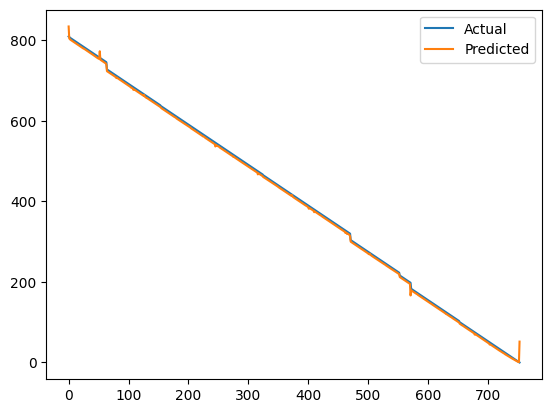

In [25]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, LSTM, Bidirectional

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...



# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Ter()(cnn_conv1)



# BiLSTM layer with regularization and dropout

bilstm_layer = Bidirectional(LSTM(32, return_sequences=False,

                                  kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)

bilstm_layer = Ter()(bilstm_layer)

# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bilstm_layer)
dense1 = Ter()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Ter()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model3 = Model(inputs=input_layer, outputs=output_layer)

combined_model3.summary()



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model3.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model

history = combined_model3.fit(X_train_norm, y_train, epochs=100, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model3.predict(X_test_norm)

regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()


# Model 2 with ReLU

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 8, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 64)             │        12,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,985 (54.63 KB)

 Trainable params: 13,985 (54.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 218.1030 - mae: 217.9156 - val_loss: 30.3844 - val_mae: 30.1285 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 33.8382 - mae: 33.5809 - val_loss: 9.7515 - val_mae: 9.4878 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 36.3481 - mae: 36.0815 - val_loss: 73.5352 - val_mae: 73.2642 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 37.5795 - mae: 37.3045 - val_loss: 29.3780 - val_mae: 29.0957 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 24.8103 - mae: 24.5249 - val_loss: 12.6201 - val_mae: 12.3223 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.4134 - mae: 6.1155 - val_loss: 7.7147 - val_mae: 7.4174 - learning_rate: 1.0000e-03
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.0502 - mae: 5.7529 - val_loss: 5.0313 - val_mae: 4.73

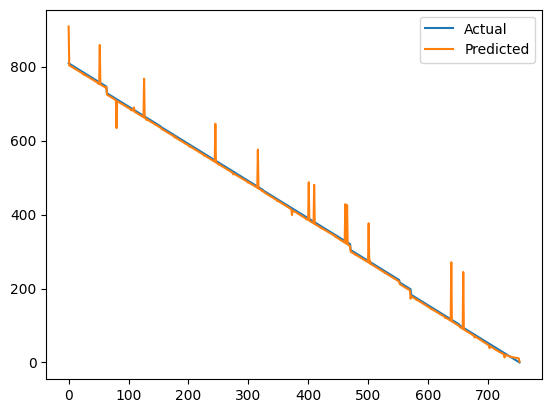

In [26]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, GRU, Bidirectional

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...



# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Activation('relu')(cnn_conv1)



# BiGRU layer with regularization and dropout

bigru_layer = Bidirectional(GRU(32, activation='relu', return_sequences=False,

                                kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)



# Dense layers

dense1 = Dense(16, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bigru_layer)

dense2 = Dense(8, activation='relu', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model4 = Model(inputs=input_layer, outputs=output_layer)

combined_model4.summary()



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model4.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model

history = combined_model4.fit(X_train_norm, y_train, epochs=100, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model4.predict(X_test_norm)

regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()


# Model 2 with Tanh

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 8, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 8, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 64)             │        12,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,985 (54.63 KB)

 Trainable params: 13,985 (54.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 550.8293 - mae: 550.7145 - val_loss: 598.7944 - val_mae: 598.7129 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 530.7603 - mae: 530.6585 - val_loss: 582.5182 - val_mae: 582.3271 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 518.1632 - mae: 517.9307 - val_loss: 567.5470 - val_mae: 567.1714 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 501.7603 - mae: 501.3245 - val_loss: 553.8215 - val_mae: 552.9982 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 487.7792 - mae: 486.9821 - val_loss: 540.4849 - val_mae: 539.5352 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 471.5266 - mae: 470.4932 - val_loss: 528.0206 - val_mae: 526.7203 - learning_rate: 0.0100
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 457.8731 - mae: 456.4726 - val_lo

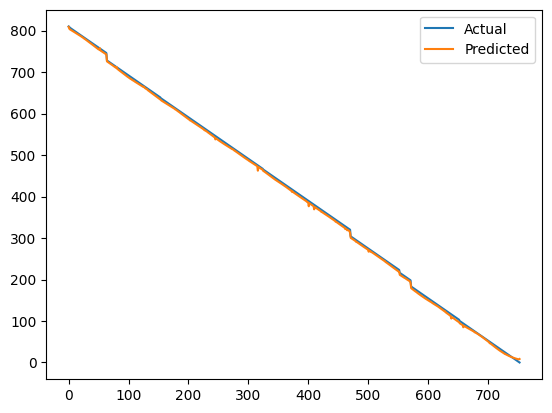

In [27]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, GRU, Bidirectional

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...



# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Activation('tanh')(cnn_conv1)



# BiGRU layer with regularization and dropout

bigru_layer = Bidirectional(GRU(32, activation='tanh', return_sequences=False,

                                kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)



# Dense layers

dense1 = Dense(16, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bigru_layer)

dense2 = Dense(8, activation='tanh', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model4 = Model(inputs=input_layer, outputs=output_layer)

combined_model4.summary()



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model4.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model

history = combined_model4.fit(X_train_norm, y_train, epochs=100, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model4.predict(X_test_norm)

regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()


# Model 2 with P_Talu

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 8, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu_4 (P_Talu)              │ (None, 8, 32)          │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 64)             │        12,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu_5 (P_Talu)              │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu_6 (P_Talu)              │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p__talu_7 (P_Talu)              │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,989 (54.64 KB)

 Trainable params: 13,989 (54.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 345.3949 - mae: 345.0110 - val_loss: 6.0639 - val_mae: 5.1791 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10.2556 - mae: 9.4154 - val_loss: 7.3039 - val_mae: 6.5560 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.9112 - mae: 8.1714 - val_loss: 11.2617 - val_mae: 10.5435 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.3225 - mae: 7.6115 - val_loss: 5.9253 - val_mae: 5.2333 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 7.5660 - mae: 6.8812 - val_loss: 9.0167 - val_mae: 8.3362 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10.1548 - mae: 9.4736 - val_loss: 8.3843 - val_mae: 7.7028 - learning_rate: 0.0100
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.1529 - mae: 6.4744 - val_loss: 6.0384 - val_mae: 5.3638 - learning_rat

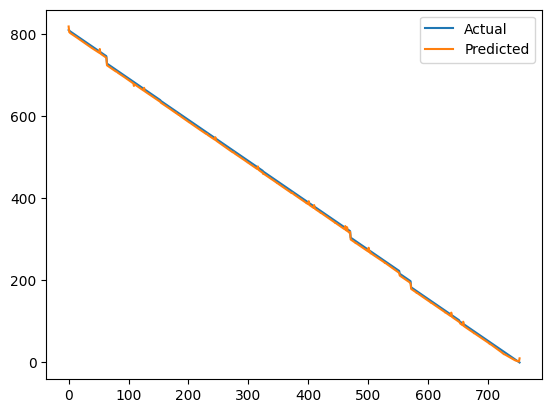

In [28]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, GRU, Bidirectional

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...



# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = P_Talu()(cnn_conv1)



# BiGRU layer with regularization and dropout

bigru_layer = Bidirectional(GRU(32, return_sequences=False,

                                kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bigru_layer = P_Talu()(bigru_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bigru_layer)
dense1 = P_Talu()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = P_Talu()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model4 = Model(inputs=input_layer, outputs=output_layer)

combined_model4.summary()



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model4.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15)


# Train the model

history = combined_model4.fit(X_train_norm, y_train, epochs=100, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model4.predict(X_test_norm)

regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()


# Model 2 with Tar

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 8, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar_4 (Tar)                     │ (None, 8, 32)          │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 64)             │        12,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar_5 (Tar)                     │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar_6 (Tar)                     │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ tar_7 (Tar)                     │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,989 (54.64 KB)

 Trainable params: 13,989 (54.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 339.9340 - mae: 339.5471 - val_loss: 26.2706 - val_mae: 25.5320 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 12.7158 - mae: 12.0106 - val_loss: 14.4255 - val_mae: 13.7843 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.8916 - mae: 9.2621 - val_loss: 13.9914 - val_mae: 13.3929 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 8.8177 - mae: 8.2268 - val_loss: 20.5752 - val_mae: 20.0060 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 9.4491 - mae: 8.8847 - val_loss: 10.7662 - val_mae: 10.2131 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.8734 - mae: 8.3220 - val_loss: 13.0172 - val_mae: 12.4720 - learning_rate: 0.0100
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.5979 - mae: 7.0598 - val_loss: 15.1430 - val_mae: 14.6116 - 

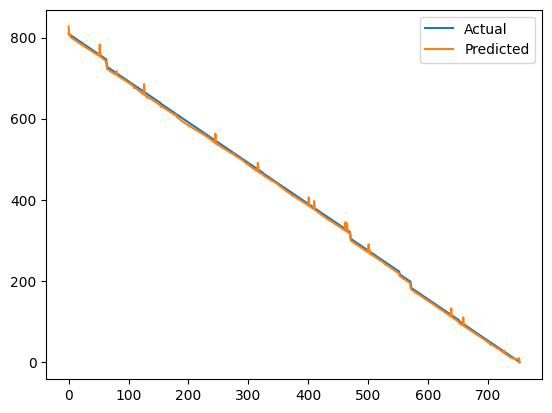

In [29]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, GRU, Bidirectional

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...



# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Tar()(cnn_conv1)



# BiGRU layer with regularization and dropout

bigru_layer = Bidirectional(GRU(32, return_sequences=False,

                                kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bigru_layer = Tar()(bigru_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bigru_layer)
dense1 = Tar()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Tar()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model4 = Model(inputs=input_layer, outputs=output_layer)

combined_model4.summary()



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model4.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15)


# Train the model

history = combined_model4.fit(X_train_norm, y_train, epochs=100, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model4.predict(X_test_norm)

regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()


# Model 2 with Trh

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 8, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh_4 (Trh)                     │ (None, 8, 32)          │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 64)             │        12,672 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh_5 (Trh)                     │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh_6 (Trh)                     │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ trh_7 (Trh)                     │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,989 (54.64 KB)

 Trainable params: 13,989 (54.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 344.4403 - mae: 344.0810 - val_loss: 14.6668 - val_mae: 13.9219 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.5672 - mae: 8.8225 - val_loss: 14.6396 - val_mae: 13.9092 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.9063 - mae: 8.1829 - val_loss: 15.0182 - val_mae: 14.3172 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.1529 - mae: 6.4585 - val_loss: 13.9541 - val_mae: 13.2812 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.8050 - mae: 7.1345 - val_loss: 8.0886 - val_mae: 7.4217 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.9459 - mae: 6.2821 - val_loss: 5.9283 - val_mae: 5.2797 - learning_rate: 0.0100
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 6.8917 - mae: 6.2408 - val_loss: 4.1461 - val_mae: 3.5041 - learning

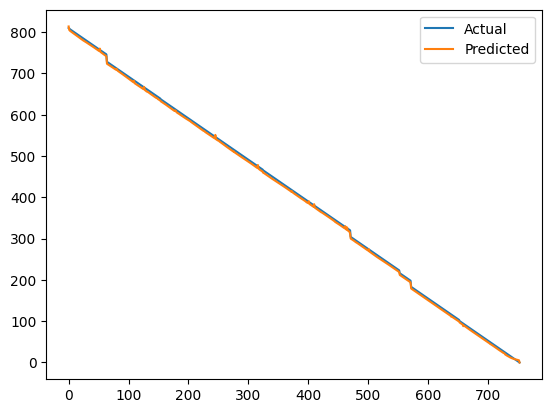

In [30]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, GRU, Bidirectional

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...



# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Trh()(cnn_conv1)



# BiGRU layer with regularization and dropout

bigru_layer = Bidirectional(GRU(32, return_sequences=False,

                                kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bigru_layer = Trh()(bigru_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bigru_layer)
dense1 = Trh()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Trh()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model4 = Model(inputs=input_layer, outputs=output_layer)

combined_model4.summary()



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model4.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15)


# Train the model

history = combined_model4.fit(X_train_norm, y_train, epochs=100, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model4.predict(X_test_norm)

regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()


# Model 2 with Ter

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 8, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 8, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter_4 (Ter)                     │ (None, 8, 32)          │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 64)             │        12,672 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter_5 (Ter)                     │ (None, 64)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter_6 (Ter)                     │ (None, 16)             │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ ter_7 (Ter)                     │ (None, 8)              │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,989 (54.64 KB)

 Trainable params: 13,989 (54.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 351.6695 - mae: 351.3379 - val_loss: 16.4743 - val_mae: 15.8701 - learning_rate: 0.0100
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 12.4177 - mae: 11.8399 - val_loss: 9.4888 - val_mae: 8.9594 - learning_rate: 0.0100
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 10.1047 - mae: 9.5774 - val_loss: 12.8194 - val_mae: 12.3004 - learning_rate: 0.0100
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.7288 - mae: 9.2109 - val_loss: 14.0776 - val_mae: 13.5768 - learning_rate: 0.0100
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 8.0694 - mae: 7.5781 - val_loss: 9.9704 - val_mae: 9.4542 - learning_rate: 0.0100
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.7369 - mae: 5.2224 - val_loss: 6.5715 - val_mae: 6.0678 - learning_rate: 1.0000e-03
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 4.8349 - mae: 4.3343 - val_loss: 6.1485 - val_mae: 5.6566 - lea

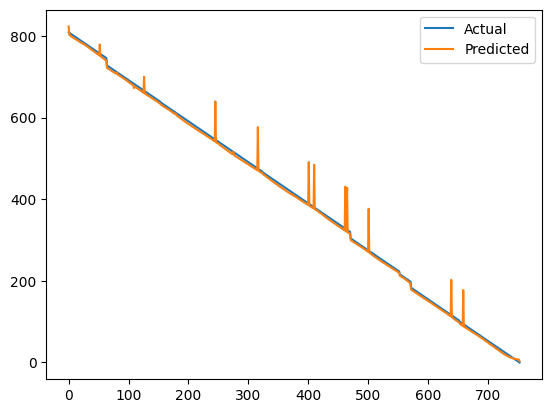

In [31]:
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Conv1D, Input, Activation, Add, Concatenate, Dropout, Dense, GRU, Bidirectional

from tensorflow.keras import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt



# ... (Code for loading data and other preprocessing steps) ...



# Create a StandardScaler object

scaler = StandardScaler()



# Normalize the training data

X_train_norm = scaler.fit_transform(X_train)

# Normalize the validation data using the same scaler object

X_val_norm = scaler.transform(X_val)

# Normalize the testing data using the same scaler object

X_test_norm = scaler.transform(X_test)



# Model definition

input_layer = Input(shape=(X_train_norm.shape[1], 1))

l2_strength = 0.001



# CNN block

nb_filters = 32

kernel_size = 3

cnn_conv1 = Conv1D(filters=nb_filters, kernel_size=kernel_size, padding='causal')(input_layer)

cnn_activation1 = Ter()(cnn_conv1)



# BiGRU layer with regularization and dropout

bigru_layer = Bidirectional(GRU(32, return_sequences=False,

                                kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength)))(cnn_activation1)
bigru_layer = Ter()(bigru_layer)


# Dense layers

dense1 = Dense(16, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(bigru_layer)
dense1 = Ter()(dense1)

dense2 = Dense(8, kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense1)
dense2 = Ter()(dense2)



# Output layer

output_layer = Dense(1, activation='linear', kernel_regularizer=l2(l2_strength), bias_regularizer=l2(l2_strength))(dense2)



# Combine the models

combined_model4 = Model(inputs=input_layer, outputs=output_layer)

combined_model4.summary()



# Compile the model with early stopping

opt = Adam(learning_rate=0.01)

combined_model4.compile(optimizer=opt, loss='mae', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=15)


# Train the model

history = combined_model4.fit(X_train_norm, y_train, epochs=100, verbose=1,

                             batch_size=64,

                             validation_data=(X_val_norm, y_val),

                             callbacks=[early_stopping, lronplat])



# Evaluate the model on the test set

y_pred_combined = combined_model4.predict(X_test_norm)

regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values

plt.plot(y_test, label='Actual')

plt.plot(y_pred_combined, label='Predicted')

plt.legend()

plt.show()
